# Inception

Also known as GoogLeNet , it is a 22-layer network that won the 2014 ILSVRC Championship.

1. The original intention of the design is to expand the width and depth on its basis .

2. which is designed motives derived from improving the performance of the depth of the network generally can increase the size of the network and increase the size of the data set to increase, but at the same time cause the network parameters and easily fit through excessive , computing resources inefficient and The production of high-quality data sets is an expensive issue.

3. Its design philosophy is to change the full connection to a sparse architecture and try to change it to a sparse architecture inside the convolution.

4. The main idea is to design an inception module and increase the depth and width of the network by continuously copying these inception modules , but GooLeNet mainly extends these inception modules in depth.

There are four parallel channels in each inception module , and concat is performed at the end of the channel .

1x1 conv is mainly used to reduce the dimensions in the article to avoid calculation bottlenecks.
It also adds additional softmax loss to some branches of the previous network layer to avoid the problem of gradient disappearance.

**Four parallel channels:**

* 1x1 conv: Borrowed from [ Network in Network ], the input feature map can be reduced in dimension and upgraded without too much loss of the input spatial information;
* 1x1conv followed by 3x3 conv: 3x3 conv increases the receptive field of the feature map, and changes the dimension through 1x1conv;
* 1x1 conv followed by 5x5 conv: 5x5 conv further increases the receptive field of the feature map, and changes the dimensions through 1x1 conv;
* 3x3 max pooling followed by 1x1 conv: The author believes that although the pooling layer will lose space information, it has been effectively applied in many fields, which proves its effectiveness, so a parallel channel is added, and it is changed by 1x1 conv Its output dimension.

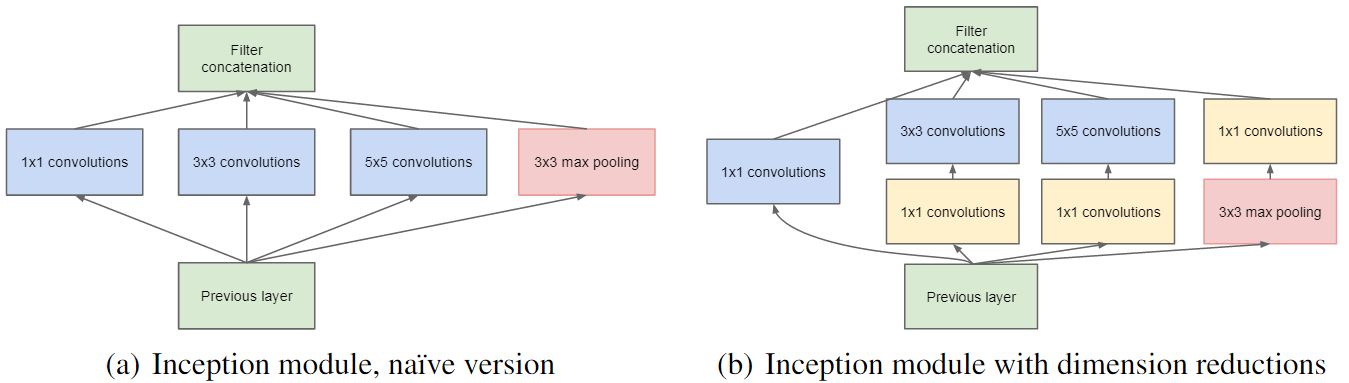

#### Complete network design : - 


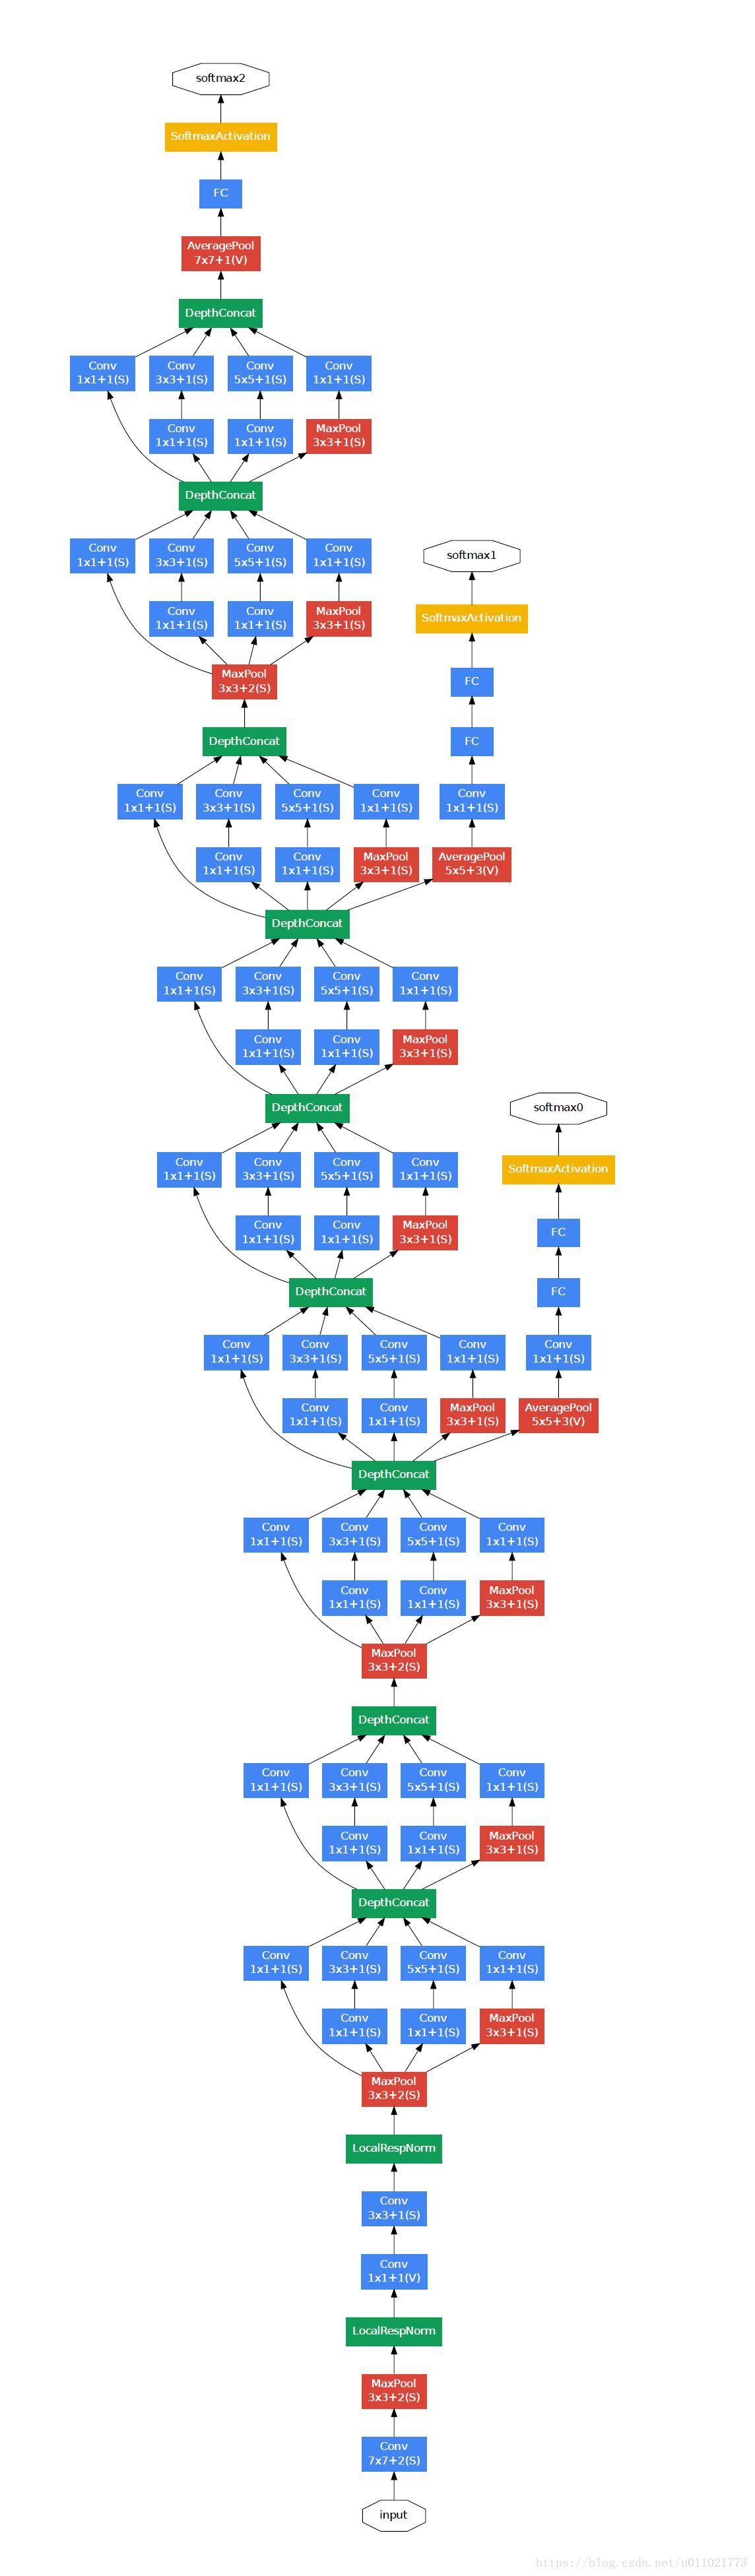

Two ways to improve network performance:

**The most direct way to improve the performance of deep neural networks is to increase their size . This includes depth, the number of levels, and their width, the size of each level unit .**

Another easy and safe way is to **increase the size of the training data**.

However, *both methods have two disadvantages* .

Larger models mean more parameters, which makes it easier for the network to overfit , especially when the number of label samples in the training data set is limited.

At the same time, because the production of high-quality training sets is tricky and expensive ,especially when some human experts do it , there is a large error rate . As shown below.


![inceptionmis.png](https://drive.google.com/uc?id=19gmSwVYyJlWFKl6N0nroUyhziwFnSiQS)


*Another shortcoming is that uniformly increasing the size of the network will increase the use of computing resources* . For example, in a deep network, if two convolutions are chained, any unified improvement of their convolution kernels will cause demand for resources. 

Power increase: If the increased capacity is inefficient, for example, if most of the weights end with 0 , then a lot of computing resources are wasted. But because the computing resources are always limited, an effective computational distribution always tends to increase the size of the model indiscriminately, and even the main objective goal is to improve the performance of the results.

The basic method to solve these two problems is to finally change the fully connected network to a sparse architecture, even inside the convolution.

The details of the GooLeNet network layer are shown in the following table:

![inceptionnetwork.png](https://drive.google.com/uc?id=1GDxGet8L4z4PTylb5XNAeI2im5Lmabil)


**To sum up:**

* 128 1x1 convolution kernels are used to reduce dimensions and modify linear activation units
* A fully connected layer of 1024 units and a modified linear activation unit;
* A dropout layer that drops neuron connections with a 70% probability;
* A linear layer with softmax loss as classification
Predict 1000 categories, but removed during the inference phase

**Training Methodology**

>The momentum is set to 0.9 and the learning rate is set to decrease by 4% every 8 epochs. 

>Seven models were trained . To make the problem more detailed, some models were trained on small crops, and some were trained on large crops .

>The factors that make the model train well include : the sampling of patches of various sizes in the image , the size of which is evenly distributed between 8% and 100%, and the aspect ratio between 3/4 and 4/3.

> **Illumination changes have an effect on avoiding overfitting.**

> **Later, random interpolation is used to resize the image.**






# Inception-v2(2015)


This architecture is a landmark in the development of deep network models . The most prominent contribution is to propose a normalized Batch Normalization layer to unify the output range of the network. It is fixed in a relatively uniform range. If the BN layer is not added, the value range of the network input and output of each layer is greatly different, so the size of the learning rate will be different. The BN layer avoids this situation This accelerates the training of the network and gives the network regular terms to a certain extent , reducing the degree of overfitting of the network. In the subsequent development of network models, most models have more or less added BN layers to the model.

In this paper, the BN layer is standardized before being input to the activation function. At the same time, VGG uses 2 3x3 convs instead of 5x5 convs in the inception module to reduce the amount of parameters and speed up the calculation.

Algorithm advantages:
1. **Improved learning rate** : In the BN model, a higher learning rate is used to accelerate training convergence, but it will not cause other effects. Because if the scale of each layer is different, then the learning rate required by each layer is different. The scale of the same layer dimension often also needs different learning rates. Usually, the minimum learning is required to ensure the loss function to decrease, but The BN layer keeps the scale of each layer and dimension consistent, so you can directly use a higher learning rate for optimization.


2. **Remove the dropout layer** : The BN layer makes full use of the goals of the dropout layer. Remove the dropout layer from the BN-Inception model, but no overfitting will occur.


3. **Decrease the attenuation coefficient of L2 weight** : Although the L2 loss controls the overfitting of the Inception model, the loss of weight has been reduced by five times in the BN-Inception model.


4. **Accelerate the decay of the learning rate** : When training the Inception model, we let the learning rate decrease exponentially. Because our network is faster than Inception, we will increase the speed of reducing the learning rate by 6 times.


5. **Remove the local response layer** : Although this layer has a certain role, but after the BN layer is added, this layer is not necessary.


6. **Scramble training samples more thoroughly** : We scramble training samples, which can prevent the same samples from appearing in a mini-batch. This can improve the accuracy of the validation set by 1%, which is the advantage of the BN layer as a regular term. In our method, random selection is more effective when the model sees different samples each time.


7. **To reduce image distortion**: Because BN network training is faster and observes each training sample less often, we want the model to see a more realistic image instead of a distorted image.


# Inception-v3-2015

This architecture focuses, how to use the convolution kernel two or more smaller size of the convolution kernel to replace, but also the introduction of **asymmetrical layers i.e. a convolution dimensional convolution**
has also been proposed for pooling layer Some remedies that can cause loss of spatial information;
there are ideas such as **label-smoothing , BN-ahxiliary** .

Experiments were performed on inputs with different resolutions . The results show that although low-resolution inputs require more time to train, the accuracy and high-resolution achieved are not much different.

**The computational cost is reduced while improving the accuracy of the network.**

**General Design Principles**

We will describe some design principles that have been proposed through extensive experiments with different architectural designs for convolutional networks. At this point, full use of the following principles can be guessed, and some additional experiments in the future will be necessary to estimate their accuracy and effectiveness.

1.  **Prevent bottlenecks in characterization** . The so-called bottleneck of feature description is that a large proportion of features are compressed in the middle layer (such as using a pooling operation). This operation will cause the loss of feature space information and the loss of features. Although the operation of pooling in CNN is important, there are some methods that can be used to avoid this loss as much as possible (I note: later hole convolution operations ).

2.  **The higher the dimensionality of the feature, the faster the training converges** . That is, the independence of features has a great relationship with the speed of model convergence. The more independent features, the more thoroughly the input feature information is decomposed. It is easier to converge if the correlation is strong. Hebbin principle : fire together, wire together.

3.  **Reduce the amount of calculation through dimensionality reduction** . In v1, the feature is first reduced by 1x1 convolutional dimensionality reduction. There is a certain correlation between different dimensions. Dimension reduction can be understood as a lossless or low-loss compression. Even if the dimensions are reduced, the correlation can still be used to restore its original information.

4.  **Balance the depth and width of the network** . Only by increasing the depth and width of the network in the same proportion can the performance of the model be maximized.



**Factorizing Convolutions with Large Filter Size**

GooLeNet uses many dimensionality reduction methods, which has achieved certain results. Consider the example of a 1x1 convolutional layer used to reduce dimensions before a 3x3 convolutional layer. In the network, we expect the network to be highly correlated between the output neighboring elements at the activation function. Therefore, we can reduce their activation values ​​before aggregation , which should generate similar local expression descriptions.

This paper explores experiments to decompose the network layer into different factors under different settings in order to improve the computational efficiency of the method . Because the Inception network is fully convolutional, each weight value corresponds to a product operation each time it is activated. 

Therefore, any reduction in computational cost will result in a reduction in parameters. This means that we can use some suitable decomposition factors to reduce the parameters and thus speed up the training.

3.1  **Factorizing Convolutions with Large Filter Size**

With the same number of convolution kernels, larger convolution kernels (such as 5x5 or 7x7) are more expensive to calculate than 3x3 convolution kernels , which is about a multiple of 25/9 = 2.78. Of course, the 5x5 convolution kernel can obtain more correlations between the information and activation units in the previous network, but under the premise of huge consumption of computing resources, a physical reduction in the size of the convolution kernel still appears. 

However, we still want to know whether a 5x5 convolutional layer can be replaced by a multi-layer convolutional layer with fewer parameters when the input and output sizes are consistent . If we scale the calculation map of 5x5 convolution, we can see that each output is like a small fully connected network sliding on the input window with a size of 5x5. Refer to Figure 1.

![5x.png](https://drive.google.com/uc?id=1C3qyD2N_K7EY5cCr7LmTze1XMuTcym4S)



Therefore, we have developed a network that explores translation invariance and replaces one layer of convolution with two layers of convolution: the first layer is a 3x3 convolution layer and the second layer is a fully connected layer . Refer to Figure 1. We ended up replacing two 5x5 convolutional layers with two 3x3 convolutional layers. Refer to Figure 4 Figure 5. This operation can realize the weight sharing of neighboring layers. It is about (9 + 9) / 25 times reduction in computational consumption.

![f1.png](https://drive.google.com/uc?id=1JipYGQyLtZYRfoPHPodRp5zPgD8qAyqZ)
![f2.png](https://drive.google.com/uc?id=1FxVSRg0B2YiPHlvBGzLCSAgNbtqrzH6E)



**Spatial Factorization into Asymmetric Convolutions**

We are wondering if the convolution kernel can be made smaller, such as 2x2, but there is an asymmetric method that can be better than this method. That is to use nx1 size convolution. For example, using the [3x1 + 1x3] convolution layer. In this case, a single 3x3 convolution has the same receptive field. Refer to Figure 3. This asymmetric method can save [((3x3)-(3 + 3)) / (3x3) = 33%] computing resources, and replacing two 2x2 only saves [11%] Computing resources.

In theory, we can have a deeper discussion and use the convolution of [1xn + nx1] instead of the convolutional layer of nxn. Refer to Figure 6. But this situation is not very good in the previous layer, but it can perform better on a medium-sized feature map [mxm, m is between 12 and 20]. In this case, use [1x7 + 7x1] convolutional layer can get a very good result.


**Utility of Auxiliary Classifiers**

Inception-v1 introduced some auxiliary classifiers (referring to some branches of the previous layer adding the softmax layer to calculate the loss back propagation) to improve the aggregation problem in deep networks. The original motive is to pass the gradient back to the previous convolutional layer , so that they can effectively and improve the aggregation of features and avoid the problem of vanishing gradients.

Traditionally, pooling layers are used in convolutional networks to reduce the size of feature maps . In order to avoid bottlenecks in the expression of spatial information, the number of convolution kernels in the network can be expanded before using max pooling or average pooling. 

For example, for a dxd network layer with K feature maps, to generate a network layer with 2K [d / 2 xd / 2] feature maps, we can use 2K convolution kernels with a step size of 1. Convolution and then add a pooling layer to get it, then this operation requires [2d 2 K 2 ]. But using pooling instead of convolution, the approximate operation is [2 * (d / 2) 2 xK 2 ], which reduces the operation by four times. However, this will cause a description bottleneck, because the feature map is reduced to [(d / 2) 2 xK], which will definitely cause the loss of spatial information on the network. Refer to Figure 9. However, we have adopted a different method to avoid this bottleneck, refer to Figure 10. That is, two parallel channels are used , one is a pooling layer (max or average), the step size is 2, and the other is a convolution layer , and then it is concatenated during output.

![grid1.png](https://drive.google.com/uc?id=1IvACU5Hr7rRucR6tAIA6K8xtAnap3-U9)

![grid2.png](https://drive.google.com/uc?id=1n2wTkA_omwy6z2SGUEM8sQh5VylcbFVW)






### Inception-v4-2016
After ResNet appeared, ResNet residual structure was added.

It is based on Inception-v3 and added the skip connection structure in ResNet. Finally, under the structure of 3 residual and 1 inception-v4 , it reached the top-5 error 3.08% in CLS (ImageNet calssification) .

1-Introduction
Residual conn works well when training very deep networks. Because the Inception network architecture can be very deep, it is reasonable to use residual conn instead of concat.

Compared with v3, Inception-v4 has more unified simplified structure and more inception modules.

![v4.png](https://drive.google.com/uc?id=1smiwtanU31PFs1WID9yAuisGWS4x-LWR)

The big picture of Inception-v4:

![b1.png](https://drive.google.com/uc?id=1cF0linutIsdOzZmeDUIba6WkLwsGhkME)

Fig9 is an overall picture, and Fig3,4,5,6,7,8 are all local structures. For the specific structure of each module, see the end of the article.

### Residual Inception Blocks

For the residual version in the Inception network, we use an Inception module that consumes less than the original Inception. The convolution kernel (followed by 1x1) of each Inception module is used to modify the dimension, which can compensate the reduction of the Inception dimension to some extent.


One is named **Inception-ResNet-v1**, which is consistent with the calculation cost of Inception-v3.
One is named **Inception-ResNet-v2**, which is consistent with the calculation cost of Inception-v4.

Figure 15 shows the structure of both. However, Inception-v4 is actually slower in practice, probably because it has more layers.

Another small technique is that we use the BN layer in the header of the traditional layer in the Inception-ResNet module, but not in the header of the summations. ** There is reason to believe that the BN layer is effective. But in order to add more Inception modules, we made a compromise between the two.

Inception-ResNet-v1

![res1in.png](https://drive.google.com/uc?id=10Nuv-clIF8UF_BNTNhsWrvk9hL5z1zTu)

Inception-ResNet-v2

![res2in.png](https://drive.google.com/uc?id=1jblKLv6iGPo7f1Axl6bwT0Yoz7qUgitg)

**Scaling of the Residuals**

This paper finds that when the number of convolution kernels exceeds 1,000 , the residual variants will start to show instability , and the network will die in the early stages of training, which means that the last layer before the average pooling layer is in the Very few iterations start with just a zero value . This situation cannot be prevented by reducing the learning rate or by adding a BN layer . Hekaiming's ResNet article also mentions this phenomenon.

This article finds that scale can stabilize the training process before adding the residual module to the activation layer . This article sets the scale coefficient between 0.1 and 0.3.

In order to prevent the occurrence of unstable training of deep residual networks, He suggested in the article that it is divided into two stages of training. The first stage is called warm-up (preheating) , that is, training the model with a very low learning first. In the second stage, a higher learning rate is used. And this article finds that if the convolution sum is very high, even a learning rate of 0.00001 cannot solve this training instability problem, and the high learning rate will also destroy the effect. But this article considers scale residuals to be more reliable than warm-up.

Even if scal is not strictly necessary, it has no effect on the final accuracy, but it can stabilize the training process.

![res3in.png](https://drive.google.com/uc?id=1Ss8aVL94uUCEKYD3Gj6f51DobefQp1pI)

**Conclusion**

Inception-ResNet-v1 : a network architecture combining inception module and resnet module with similar calculation cost to Inception-v3;

Inception-ResNet-v2 : A more expensive but better performing network architecture.

Inception-v4 : A pure inception module, without residual connections, but with performance similar to Inception-ResNet-v2.


**A big picture of the various module structures of Inception-v4 / Inception-ResNet-v1 / v2:**

- Fig3-Stem: (Inception-v4 & Inception-ResNet-v2)

![res4in.png](https://drive.google.com/uc?id=19NVmKcBoIRtjRClL9XZ5llNdFUgHWz-i)

- Fig4-Inception-A: (Inception-v4)

![grid1.png](https://drive.google.com/uc?id=1sTaL5gfZkcLz16ZWOZpFCZpcrUlHsfma)

- Fig5-Inception-B: (Inception-v4)

![res6in.png](https://drive.google.com/uc?id=1zttMwkpBUXz5xZ1Pf_cP-4g9alBP6Kjt)

- Fig6-Inception-C: (Inception-v4)

![res7in.png](https://drive.google.com/uc?id=1HdhXgGofGttbezvQkOMATuN2asDI9AR3)

- Fig7-Reduction-A: (Inception-v4 & Inception-ResNet-v1 & Inception-ResNet-v2)

![res8in.png](https://drive.google.com/uc?id=19gLSSbwlwkR3l_0hjLJrwGIiuBYsMkmB)

- Fig8-Reduction-B: (Inception-v4)

![res9in.png](https://drive.google.com/uc?id=17g__G4nqncwxJXtuXDgr_YdTVCirnUiQ)

- Fig10-Inception-ResNet-A: (Inception-ResNet-v1)

![res10in.png](https://drive.google.com/uc?id=1Gela0sYuC_3924R6E6AZwO7_15EpG85e)

- Fig11-Inception-ResNet-B: (Inception-ResNet-v1)

![res11in.png](https://drive.google.com/uc?id=10SUsODEZTywpss_gTmYeG7iMOOai-tYN)

- Fig12-Reduction-B: (Inception-ResNet-v1)

![res12in.png](https://drive.google.com/uc?id=1BGX2N1JOzGAu2ogDnAyW8Oug1H17gFbF)

- Fig13-Inception-ResNet-C: (Inception-ResNet-v1)

![res13in.png](https://drive.google.com/uc?id=1byvIAPexfxiBspptGxfrdkZ9iwQQM2Id)

- Fig14-Stem: (Inception-ResNet-v1)

![res14in.png](https://drive.google.com/uc?id=1_IjrW3JYTmMpXN--oWXS4UBxAB-bptGD)

- Fig16-Inception-ResNet-A: (Inception-ResNet-v2)

![res15in.png](https://drive.google.com/uc?id=1VNRHVWSSJNkSjVL7uwmQe7QyR8gtodPV)

- Fig17-Inception-ResNet-B: (Inception-ResNet-v2)

![res16in.png](https://drive.google.com/uc?id=15z4IGj_qWRZZogk0TZ0-GeFUmAo1h_A2)

- Fig18-Reduction-B: (Inception-ResNet-v2)

![res17in.png](https://drive.google.com/uc?id=1YHZX_e_sriO4arUQpQ34KEi7BJEo9NLl)

- Fig19-Inception-ResNet-C: (Inception-ResNet-v2)

![res18in.png](https://drive.google.com/uc?id=1PDQTs_x2ElVeTJ5Ez60G419y9JIPsIFu)


























## Summary

* Inception v1 network, 1x1, 3x3, 5x5 conv and 3x3 pooling and stacking together, on the one hand, increase the width of the network, and on the other hand, increase the adaptability of the network to scale.


* The network of v2 has been improved based on v1. On the one hand, the BN layer has been added to reduce the internal covariate shift (the internal neuron's data distribution has changed), so that the output of each layer is normalized to an N (0, 1) Gaussian, on the other hand, learning VGG replaces 5x5 in the inception module with two 3x3 convs, which reduces the number of parameters and speeds up the calculation.


* One of the most important improvements in v3 is Factorization, which decomposes 7x7 into two one-dimensional convolutions (1x7, 7x1), and 3x3 is the same (1x3, 3x1). This benefit can speed up calculations (redundant calculations Capacity can be used to deepen the network), and one conv can be split into two convs, which further increases the network depth and increases the nonlinearity of the network. It is also worth noting that the network input has changed from 224x224 to 299x299, which is more refined. Designed 35x35 / 17x17 / 8x8 modules.


* v4 studied whether the Inception module combined with the Residual Connection can be improved? It was found that the structure of ResNet can greatly speed up training and improve performance at the same time. An Inception-ResNet v2 network was obtained. At the same time, a deeper and more optimized Inception v4 model was designed to achieve performance comparable to Inception-ResNet v2

### Code implementation

In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset can be downloaded from here:
https://drive.google.com/drive/folders/1ibPZoLU8YJz-1nhKOqtcsVFduMDIvJAs?usp=sharing

In [4]:
base_dir = '/content/drive/MyDrive/CNN_architecture/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
10/10 - 764s - loss: 0.6837 - acc: 0.5700 - val_loss: 0.6926 - val_acc: 0.5000 - 764s/epoch - 76s/step
Epoch 2/10
10/10 - 69s - loss: 0.6928 - acc: 0.5100 - val_loss: 0.6895 - val_acc: 0.5470 - 69s/epoch - 7s/step
Epoch 3/10
10/10 - 66s - loss: 0.7064 - acc: 0.4250 - val_loss: 0.6901 - val_acc: 0.5000 - 66s/epoch - 7s/step
Epoch 4/10
10/10 - 54s - loss: 0.6920 - acc: 0.5200 - val_loss: 0.6922 - val_acc: 0.5000 - 54s/epoch - 5s/step
Epoch 5/10
10/10 - 50s - loss: 0.6952 - acc: 0.5250 - val_loss: 0.6890 - val_acc: 0.5020 - 50s/epoch - 5s/step
Epoch 6/10
10/10 - 50s - loss: 0.6885 - acc: 0.5550 - val_loss: 0.6873 - val_acc: 0.5000 - 50s/epoch - 5s/step
Epoch 7/10
10/10 - 37s - loss: 0.6882 - acc: 0.5300 - val_loss: 0.6896 - val_acc: 0.5190 - 37s/epoch - 4s/step
Epoch 8/10
10/10 - 37s - loss: 0.7015 - acc: 0.4650 - val_loss: 0.6856 - val_acc: 0.5080 - 37s/epoch - 4s/step
Epoch 9/10
10/10 - 25s - loss: 0.6912 - acc: 0.5400 - val_loss: 0.6834 - val_acc: 0.5240 - 25s/epoch - 3s/ste

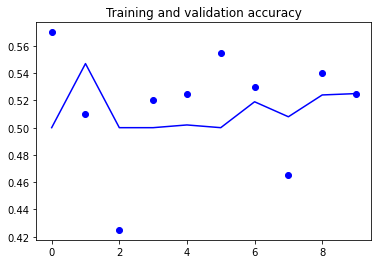

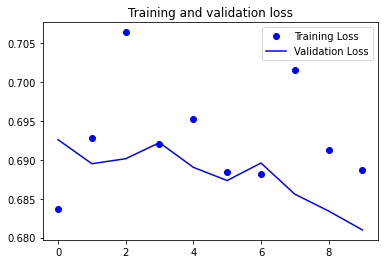

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()